1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

2: Load Data and perform EDA

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Target: 0 (malignant), 1 (benign)


2_A. Exploratory Data Analysis (EDA)

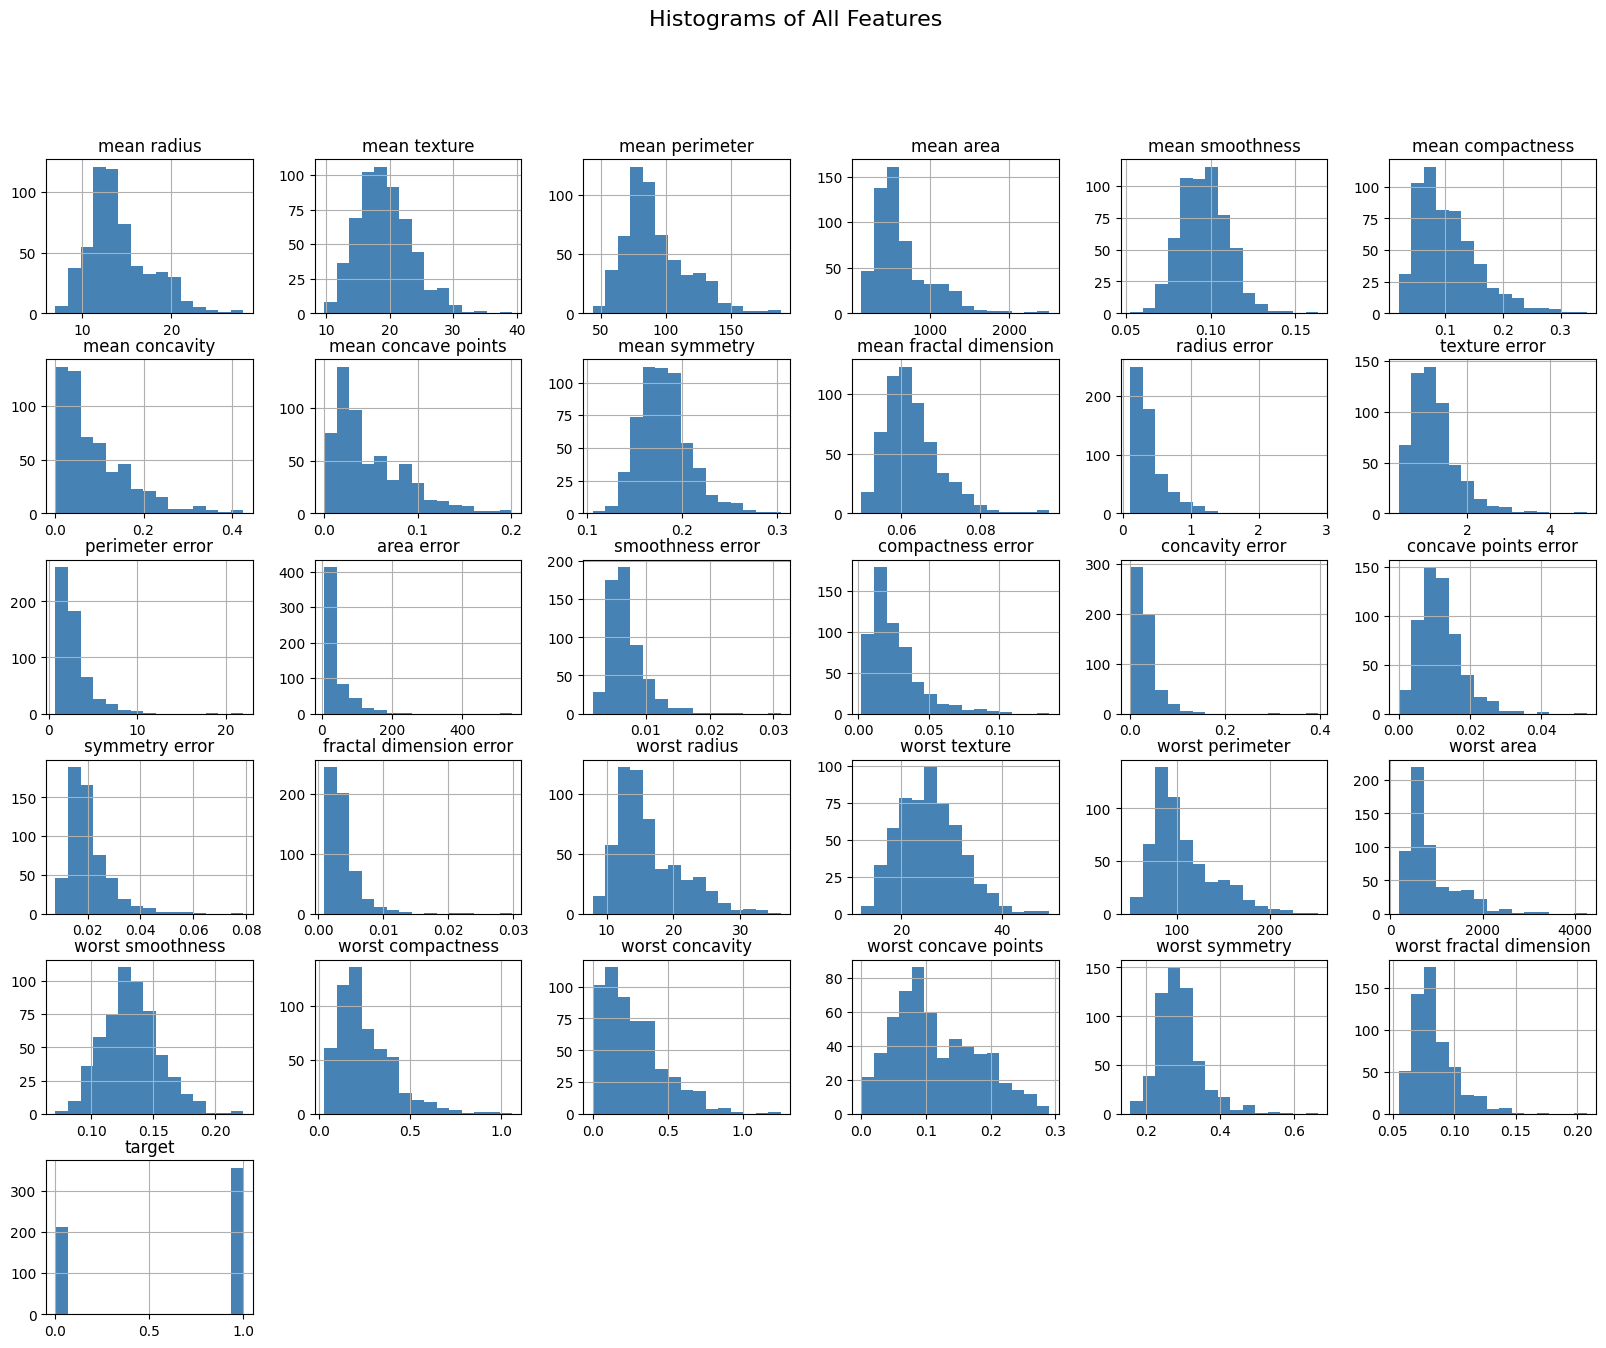

In [3]:
## 1.1 Histograms for Feature Distributions
df.hist(bins=15, figsize=(20, 15), color='steelblue')
plt.suptitle("Histograms of All Features", size=16)
plt.savefig('static/histograms.png')
plt.show()

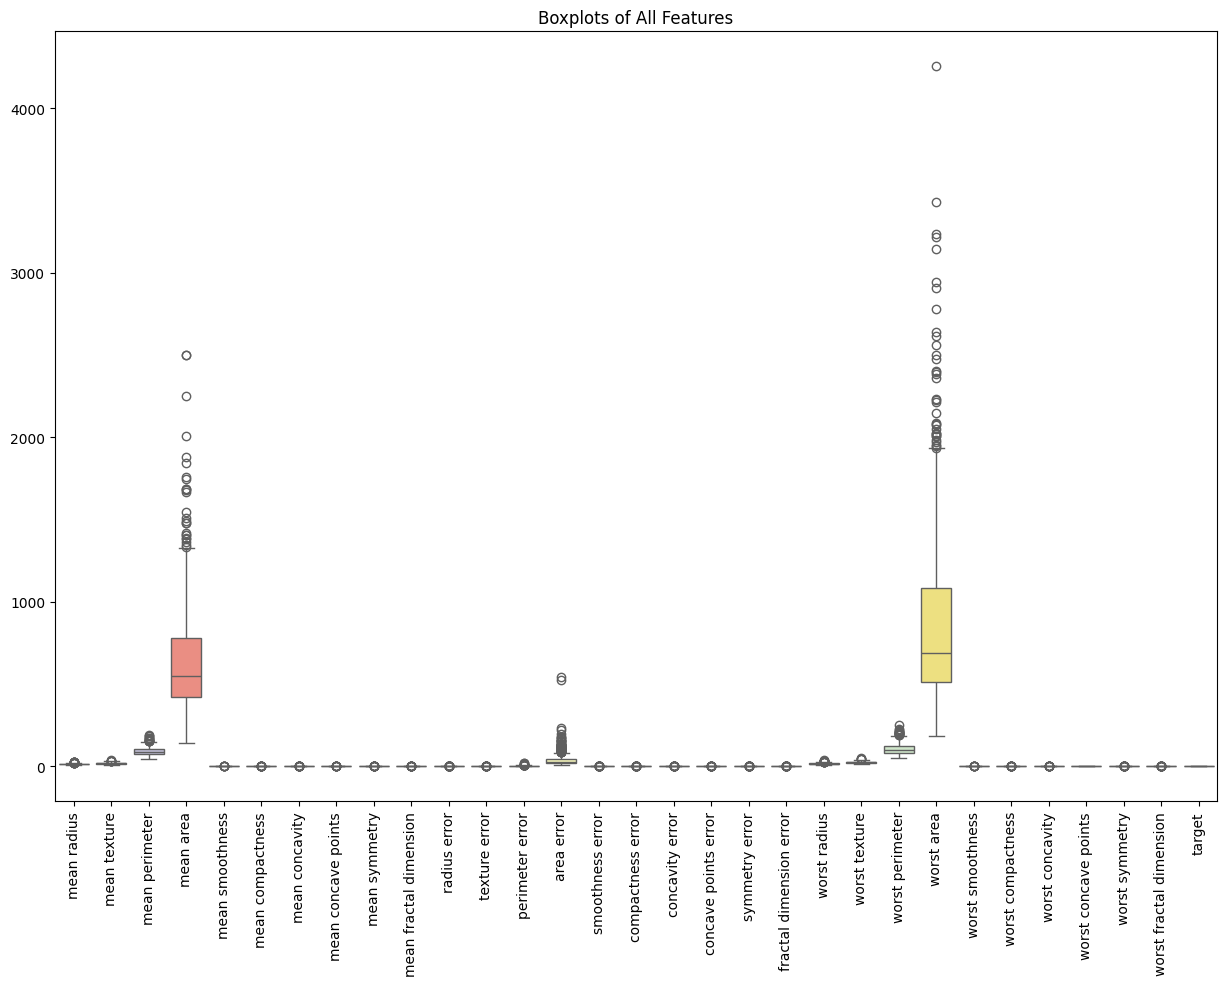

In [4]:
## 1.2 Boxplots to Visualize Outliers and Distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title("Boxplots of All Features")
plt.savefig('static/boxplots.png')
plt.show()



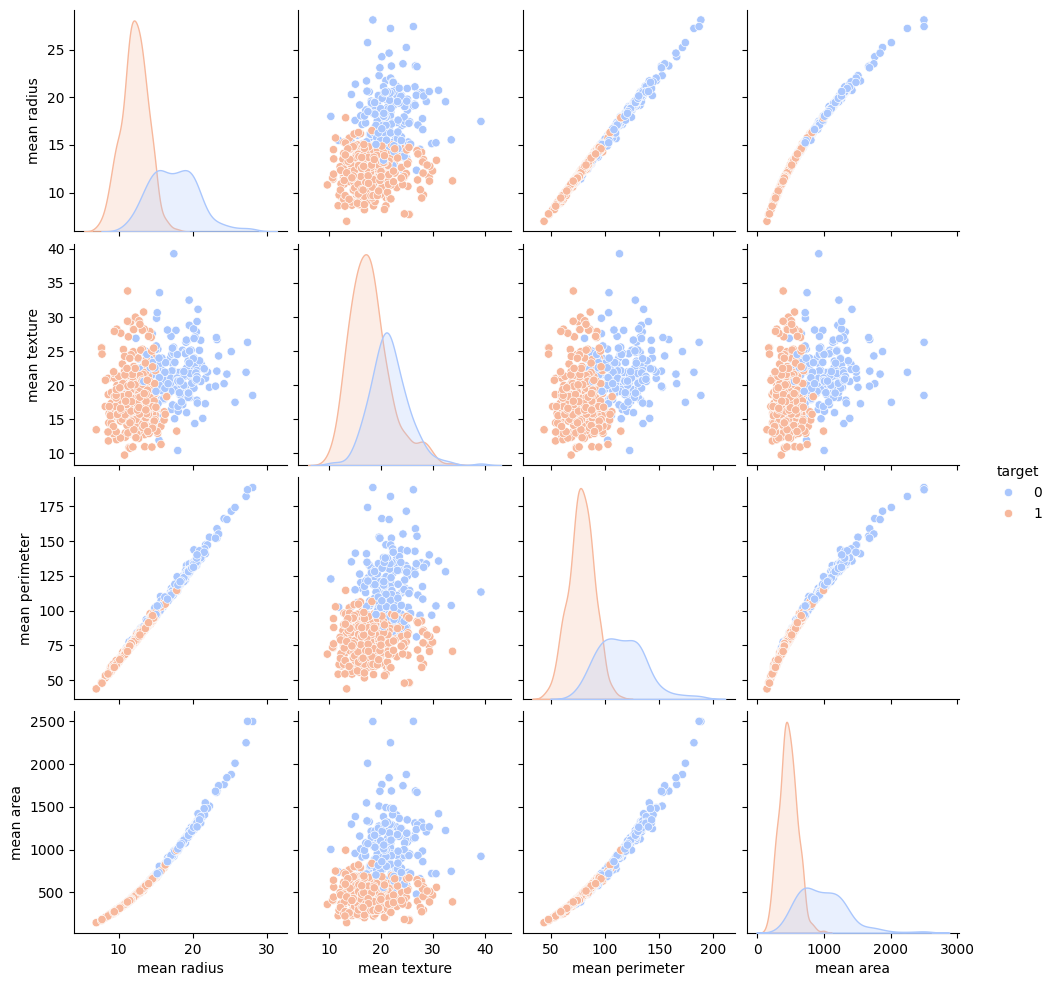

In [5]:
# 1.3 Pair Plot for Selected Features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.savefig('static/pairplot.png')
plt.show()

/var/folders/p4/_lg8k9xs30x1tc282bsyfmf40000gn/T/ipykernel_9284/544288627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


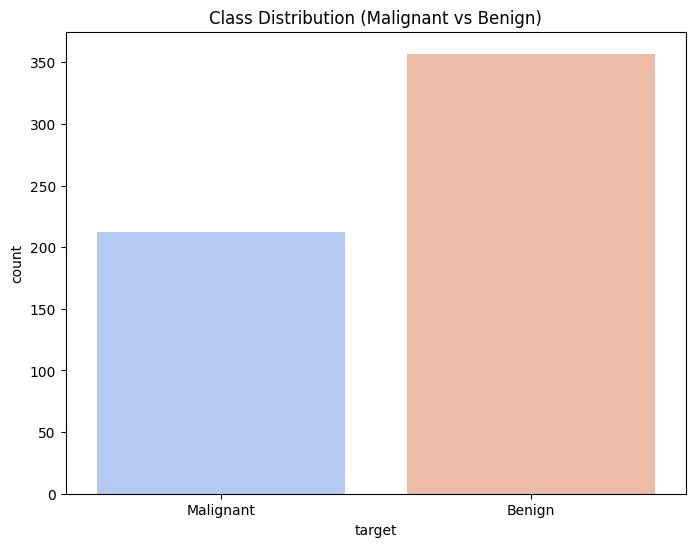

In [6]:
## 1.4 Check Class Imbalance (Malignant vs. Benign)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Class Distribution (Malignant vs Benign)')
plt.xticks(ticks=[0, 1], labels=["Malignant", "Benign"])
plt.savefig('static/class_distribution.png')
plt.show()

In [7]:
# Correlation Analysis Using a Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.savefig('static/correlation_heatmap.png')
plt.close()


3: Prepare Data, Train Model, and Save It



In [8]:
# Splitting the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardizing the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [11]:
# Setting up the Neural Network Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),  # Flatten the input features to 1D
    keras.layers.Dense(20, activation='relu'),  # Hidden layer with 20 neurons
    keras.layers.Dense(2, activation='softmax')  # Output layer with 2 neurons (binary classification)
])

/Users/sahilsharma/Desktop/Data Science with AI and ML ( 45 days training )/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compilation of Model

model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])


In [13]:
# Training the Neural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10, verbose=0)

In [14]:
# Evaluate the Model (to build the metrics)
loss, accuracy = model.evaluate(X_test_std, Y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9522 - loss: 0.0922


In [15]:
# After training or evaluating, you can now check the compiled metrics
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 95.61%


In [16]:
# Save the model
model.save('cancer_model.h5')

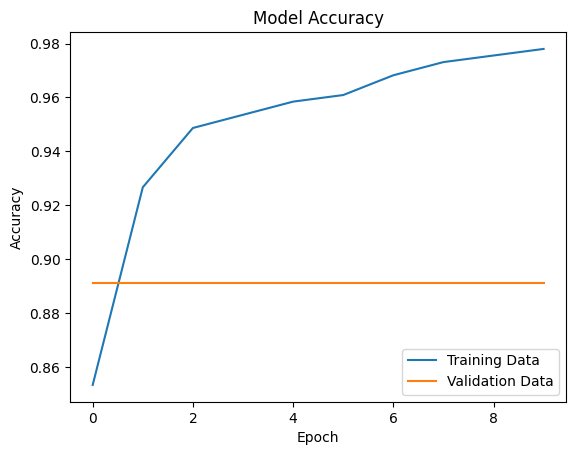

In [17]:
# Plotting training progress
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.savefig('static/training_accuracy.png')
plt.show()

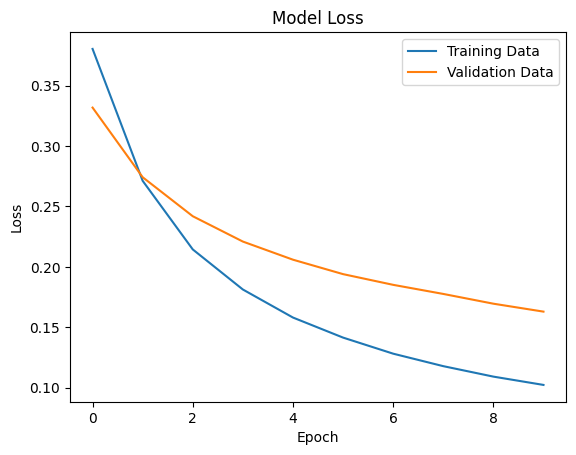

In [18]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.savefig('static/training_loss.png')
plt.show()


4 : Make predictions

In [19]:
# Example input data for prediction (replace with actual input)
example_input = np.random.rand(30)  # Random example data with 30 features


In [20]:
# Standardize input data
example_input_std = scaler.transform([example_input])


/Users/sahilsharma/Desktop/Data Science with AI and ML ( 45 days training )/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Predict the class
prediction = model.predict(example_input_std)
prediction_label = np.argmax(prediction, axis=1)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [22]:
# Output the result
result = "Malignant" if prediction_label == 0 else "Benign"
print(f"Prediction Label: {prediction_label}")
print(f"Result: {result}")


Prediction Label: 1
Result: Benign
